<a href="https://colab.research.google.com/github/priyanshgupta1998/Natural-language-processing-NLP-/blob/master/MyWays_Assignment/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d paultimothymooney/mueller-report

 93% 115M/124M [00:03<00:00, 30.8MB/s]
100% 124M/124M [00:03<00:00, 36.9MB/s]


In [4]:
!unzip mueller-report.zip

Archive:  mueller-report.zip
  inflating: mueller_report.csv      
  inflating: muellerreport.pdf       


In [5]:
import pandas as pd
data = pd.read_csv('mueller_report.csv')
print(data.shape)
data.head()

(19195, 3)


,page,line,text
0,1,1,U.S. Department of Justice
1,1,2,"AttarAe:,c\\'erlc Predtiet // Mtt; CeA1:ttiA"
2,1,3,Ma1:ertalPrn1:eetedUAder Fed. R. Crhtt. P. 6(e)
3,1,4,Report On The Investigation Into
4,1,5,Russian InterferenceIn The


In [8]:
print('total unique pages OR total number of pages : ' , data['page'].nunique())  
data['page'].value_counts()   

total unique pages OR total number of pages :  448


329    59
250    57
100    57
249    57
247    57
       ..
440     3
8       3
396     3
416     3
2       3
Name: page, Length: 448, dtype: int64

In [9]:
data_page= data.groupby('page')['text'].apply(lambda text: ''.join(text.to_string(index=False))).str.replace('(\\n)', '').reset_index()
print(data_page.shape)
data_page.head()

(448, 2)


,page,text
0,1,U.S. Department of Justi...
1,2,U.S. Department of Jus...
2,3,U.S. Department of Jus...
3,4,U.S. Department of Jus...
4,5,U.S. Department of Jus...


In [12]:
data_page['text'][0]

"                      U.S. Department of Justice    AttarAe:,c\\\\'erlc Predtiet // Mtt; CeA1:ttiA Ma1:ertalPrn1:eetedUAder Fed. R. Crhtt. P. 6(e)                Report On The Investigation Into                      Russian InterferenceIn The                       2016 PresidentialElection                                  Volume I of II          Special Counsel Robert S. Mueller, III      Submitted Pursuant to 28 C.F.R. § 600.8(c)                                Washington, D.C.                                      March 2019                                             NaN"

In [15]:
# Transform string data and remove punctuation
import string
punc = string.punctuation
print(punc)
data_page['text'] = data_page.text.apply(lambda x: x.lower())
data_page['text'] = data_page.text.apply(lambda x: ''.join([c for c in x if c not in punc]))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [16]:
data_page['text'][0]

'                      us department of justice    attaraecerlc predtiet  mtt cea1ttia ma1ertalprn1eeteduader fed r crhtt p 6e                report on the investigation into                      russian interferencein the                       2016 presidentialelection                                  volume i of ii          special counsel robert s mueller iii      submitted pursuant to 28 cfr § 6008c                                washington dc                                      march 2019                                             nan'

In [17]:
#stopwords and tokenizations
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
#making the stopword set from basic english and the given list of stopwords'
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stopset = set(w.upper() for w in stopwords.words('english'))
#adding more stopwords from text file of stopwords
import glob
path = "StopWords*.txt"
glob.glob(path)
for filename in glob.glob(path):
    with open(filename, 'r') as f:
        text = f.read()
        text = re.sub(r"\s+\|\s+[\w]*" , "", text)        
        stopset.update(text.upper().split())

data_page['text'] = data_page.text.apply(lambda x: word_tokenize(x))

data_page['text'] = data_page.text.apply(lambda x: [w for w in x if w not in stopset])

data_page['text'] = data_page.text.apply(lambda x: ' '.join(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [18]:
data_page['text'][0]

'us department of justice attaraecerlc predtiet mtt cea1ttia ma1ertalprn1eeteduader fed r crhtt p 6e report on the investigation into russian interferencein the 2016 presidentialelection volume i of ii special counsel robert s mueller iii submitted pursuant to 28 cfr § 6008c washington dc march 2019 nan'

In [0]:
import re
def clean_text(text):
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"nan", " ", text)
    text = re.sub(r"name", " ", text)
    text = re.sub(r"dtype", " ", text)
    text = re.sub(r"object", " ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text
data_page['text'] = data_page['text'].map(lambda com : clean_text(com))

In [21]:
data_page['text'][0]

'us department of justice attaraecerlc predtiet mtt cea1ttia ma1ertalprn1eeteduader fed r crhtt p 6e report on the investigation into russian interferencein the 2016 presidentialelection volume i of ii special counsel robert s mueller iii submitted pursuant to 28 cfr 6008c washington dc march 2019'

In [0]:
#collect the unique words
from collections import Counter

text = ' '.join(data_page['text'].tolist())
review_word = text.split(' ')
all_reviews = ' '.join(review_word)
words = all_reviews.split()

# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints = []
for review in review_word:
    reviews_ints.append([vocab_to_int[word] for word in review.split()])

In [24]:
print('Unique words: ', len((vocab_to_int)))

Unique words:  12223


In [26]:
counts.most_common(25)

[('the', 5861),
 ('to', 3198),
 ('of', 2553),
 ('and', 1915),
 ('at', 1699),
 ('that', 1659),
 ('a', 1539),
 ('in', 1433),
 ('302', 1317),
 ('with', 937),
 ('on', 903),
 ('president', 885),
 ('trump', 733),
 ('us', 691),
 ('i', 667),
 ('was', 662),
 ('he', 653),
 ('not', 570),
 ('justice', 549),
 ('for', 517),
 ('department', 514),
 ('had', 512),
 ('cohen', 482),
 ('s', 481),
 ('2016', 480)]

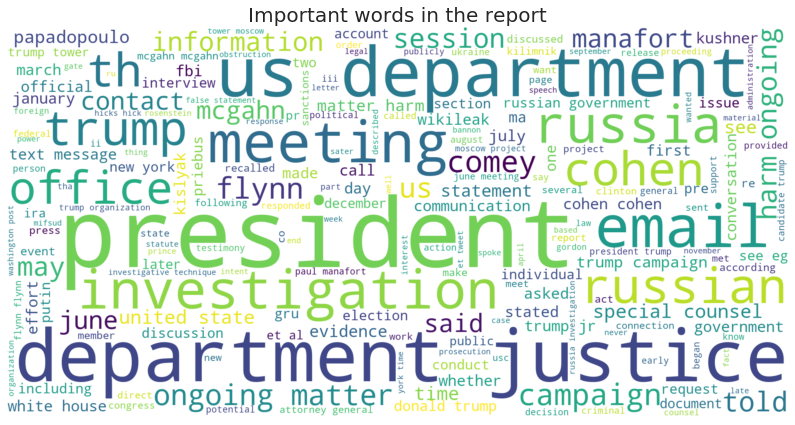

In [33]:
#word cloud
import numpy as np
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(321)
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(data_page['text'].tolist())

wordcloud = WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Important words in the report',size=20)
plt.show()

In [0]:
#Text expolaration through SpaCy
import spacy
nlp = spacy.load('en')

# def explain_text_entities(text):
#     doc = nlp(text)
#     for ent in doc.ents:
#         print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')

In [36]:
data_page['text'][15]

'us department of justice atterttey nerk prndttet mtty cetttttitt mo national security agencythat concluded with h election through a variety of means to assist declassified version of the assessment was pub between midjanuary 2017 and early february 20 house permanent select committee on intelligen intelligence ssci and the senate judiciary conduct inquiries or had already been conduct election thenfbi director james comey later investigation into russian interference that h opensession testimony before hpsci comey sta i have been authorized by the department of ju of our counterintelligence mission is investi to interfere in the 2016 presidential election nature of any links between individuals associ the russian government and whether there was a campaign and russia s efforts as wit this will also include an assessment of whethe the investigation continued under thendirecto 2017 when president trump fired comey as fbi volume ii of the rep01t on may 17 2017 acting attorney general ro

In [37]:
for i in range(15,16):
    one_sentence = data_page['text'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)

In [39]:
data_page['text'][17]

'us department of justice attoraey work proa11et mieycotttaiamateri manafort lied to the office and the grand jury with konstantin kilimnik about trump campaign the office investigated several other events t potential russiarelated contacts for example between russian ambassador kislyak and trump c 2016 foreign policy speech in washington dc convention were brief public and nonsubstan one campaign officials efforts to dilute a po assistance to ukraine were undertaken at the b investigation also did not establish that a me 2016 at sessionss senate office included any campaign the investigation did not always yield admissi picture of the activities undertaken by subjec their fifth amendment right against compelled judgment appropriate candidates for grants of witnesses and informationsuch as information members of the mediain light of internal depa manual 913400 13410 some of the informa presumptively covered by legal privilege and w taint team even when individuals testified provided in

In [41]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 826.9MB 109.0MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.1.0-cp36-none-any.whl size=828255076 sha256=032601a3aee18e17ae9844b7b26e93a4def2f04c57855d63d9c7513050d56e1e
  Stored in directory: /tmp/pip-ephem-wheel-cache-7uyeai4a/wheels/b4/d7/70/426d313a459f82ed5e06cc36a50e2bb2f0ec5cb31d8e0bdf09
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [42]:
import spacy
for i in ['en_core_web_sm','en_core_web_lg']:
    nlp = spacy.load(i)
    print('This is model:',i)
    for j in range(17,18):
        one_sentence = data_page['text'][j]
        doc = nlp(one_sentence)
        spacy.displacy.render(doc, style='ent',jupyter=True)

This is model: en_core_web_sm


OSError: ignored